In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path

# 설정C:\Users\Developer\TCLab\csv
csv_folder = Path("C:\\Users\\Developer\\TCLab\\csv")

csv_files = sorted(csv_folder.glob("mpc_episode_*_data.csv"))
# C:\Users\Developer\TCLab\csv\data_back4
E1, E2 = 1.0, 1.0  # 가중치 설정

all_observations = []
all_actions = []
all_next_observations = []
all_rewards = []
all_dones = []

for file in csv_files:
    df = pd.read_csv(file)
    for i in range(len(df) - 1):
        curr = df.iloc[i]
        next_ = df.iloc[i + 1]
        
        state = [curr["T1"], curr["T2"], curr["TSP1"], curr["TSP2"]]
        action = [curr["Q1"], curr["Q2"]]
        next_state = [next_["T1"], next_["T2"], next_["TSP1"], next_["TSP2"]]
        
        # L2 norm 기반 reward
        error_vec = np.array([curr["TSP1"] - curr["T1"], curr["TSP2"] - curr["T2"]])
        reward = -np.linalg.norm(error_vec)
        
        done = (i == len(df) - 2)

        all_observations.append(state)
        all_actions.append(action)
        all_next_observations.append(next_state)
        all_rewards.append(reward)
        all_dones.append(done)

# numpy 배열로 변환
dataset = {
    "observations": np.array(all_observations, dtype=np.float32),
    "actions": np.array(all_actions, dtype=np.float32),
    "next_observations": np.array(all_next_observations, dtype=np.float32),
    "rewards": np.array(all_rewards, dtype=np.float32),
    "terminals": np.array(all_dones, dtype=bool),
}
print("Reward 평균:", np.mean(all_rewards))
print("Reward 최소:", np.min(all_rewards))
print("Reward 최대:", np.max(all_rewards))

# 저장
output_path_l2 = csv_folder.parent / "mpc_dataset.npz"
np.savez(output_path_l2, **dataset)



Reward 평균: -9.310084092646807
Reward 최소: -47.412083902735176
Reward 최대: -0.00999999999999801


reward = -np.linalg.norm(error_vec) * 0.1


In [3]:
import numpy as np
import pandas as pd
from pathlib import Path

# 설정C:\Users\Developer\TCLab\csv
csv_folder = Path("C:\\Users\\Developer\\TCLab\\csv")
csv_files = sorted(csv_folder.glob("mpc_episode_*_data.csv"))

E1, E2 = 1.0, 1.0  # 가중치 설정

all_observations = []
all_actions = []
all_next_observations = []
all_rewards = []
all_dones = []

for file in csv_files:
    df = pd.read_csv(file)
    for i in range(len(df) - 1):
        curr = df.iloc[i]
        next_ = df.iloc[i + 1]
        
        state = [curr["T1"], curr["T2"], curr["TSP1"], curr["TSP2"]]
        action = [curr["Q1"], curr["Q2"]]
        next_state = [next_["T1"], next_["T2"], next_["TSP1"], next_["TSP2"]]
        
        # L2 norm 기반 reward
        error_vec = np.array([curr["TSP1"] - curr["T1"], curr["TSP2"] - curr["T2"]])
        reward = -np.linalg.norm(error_vec) * 0.1
        
        done = (i == len(df) - 2)

        all_observations.append(state)
        all_actions.append(action)
        all_next_observations.append(next_state)
        all_rewards.append(reward)
        all_dones.append(done)

# numpy 배열로 변환
dataset = {
    "observations": np.array(all_observations, dtype=np.float32),
    "actions": np.array(all_actions, dtype=np.float32),
    "next_observations": np.array(all_next_observations, dtype=np.float32),
    "rewards": np.array(all_rewards, dtype=np.float32),
    "terminals": np.array(all_dones, dtype=bool),
}
print("Reward 평균:", np.mean(all_rewards))
print("Reward 최소:", np.min(all_rewards))
print("Reward 최대:", np.max(all_rewards))

acts = dataset['actions']

print("[Debug] Action range in dataset:", acts.min(), "~", acts.max())
print("[Debug] Action mean:", acts.mean(axis=0), "std:", acts.std(axis=0))

# 저장
# output_path_l2 = csv_folder.parent / "mpc_dataset1.npz"
# np.savez(output_path_l2, **dataset)



Reward 평균: -0.931008409264681
Reward 최소: -4.741208390273518
Reward 최대: -0.0009999999999998012
[Debug] Action range in dataset: 0.0 ~ 100.0
[Debug] Action mean: [30.623505 40.10309 ] std: [42.8137   44.337543]


In [27]:
import numpy as np
import pandas as pd
from pathlib import Path

# 두 개의 csv 디렉토리 경로
csv_folders = [
    Path("C:/Users/Developer/TCLab/csv"),
    Path("C:/Users/Developer/TCLab/csv/data_back4")
]

E1, E2 = 1.0, 1.0  # 가중치 설정

all_observations = []
all_actions = []
all_next_observations = []
all_rewards = []
all_dones = []

# 모든 폴더에서 CSV 병합
for folder in csv_folders:
    csv_files = sorted(folder.glob("mpc_episode_*_data.csv"))
    print("------------ 총 에피소드 갯수 ----------------")
    print(len(csv_files))
    for file in csv_files:
        df = pd.read_csv(file)
        for i in range(len(df) - 1):
            curr = df.iloc[i]
            next_ = df.iloc[i + 1]
            
            state = [curr["T1"], curr["T2"], curr["TSP1"], curr["TSP2"]]
            action = [curr["Q1"], curr["Q2"]]
            next_state = [next_["T1"], next_["T2"], next_["TSP1"], next_["TSP2"]]
            
            # L2 norm 기반 reward
            error_vec = np.array([curr["TSP1"] - curr["T1"], curr["TSP2"] - curr["T2"]])
            reward = -np.linalg.norm(error_vec)
            #reward = -np.sum(error_vec ** 2)  # L2 norm → squared L2 norm

            
            # reward += 10.0  # shift: 음수를 양수로
            # reward *= 0.1   # scale: 보상 범위 조정

          #  reward += 10.0    # 적절한 offset
          #  reward *=     
            
            done = (i == len(df) - 2)

            all_observations.append(state)
            all_actions.append(action)
            all_next_observations.append(next_state)
            all_rewards.append(reward)
            all_dones.append(done)

# numpy 배열로 변환
dataset = {
    "observations": np.array(all_observations, dtype=np.float32),
    "actions": np.array(all_actions, dtype=np.float32),
    "next_observations": np.array(all_next_observations, dtype=np.float32),
    "rewards": np.array(all_rewards, dtype=np.float32),
    "terminals": np.array(all_dones, dtype=bool),
}
print("총 샘플 수:", len(dataset["observations"]))

# 리워드 통계 출력
print("Reward 평균:", np.mean(all_rewards))
print("Reward 최소:", np.min(all_rewards))
print("Reward 최대:", np.max(all_rewards))

acts = dataset['actions']

print("[Debug] Action range in dataset:", acts.min(), "~", acts.max())
print("[Debug] Action mean:", acts.mean(axis=0), "std:", acts.std(axis=0))

rewards = dataset['rewards']
print("[Debug] rewards range in dataset:", rewards.min(), "~", rewards.max())
print("[Debug] rewards mean:", rewards.mean(axis=0), "std:", rewards.std(axis=0))


observations = dataset['observations']
print("[Debug] observations range in dataset:", observations.min(), "~", observations.max())
print("[Debug] observations mean:", observations.mean(axis=0), "std:", observations.std(axis=0))
# 저장 경로 (부모 디렉토리에 저장)
output_path = "C:\\Users\\Developer\\TCLab\\Data\\MPC\\mpc1.npz"
np.savez(output_path, **dataset)
print(f"✅ 저장 완료: {output_path}")


------------ 총 에피소드 갯수 ----------------
29
------------ 총 에피소드 갯수 ----------------
82
총 샘플 수: 26450
Reward 평균: -7.126432123714284
Reward 최소: -46.79378270668016
Reward 최대: -0.009999999999990905
[Debug] Action range in dataset: 0.0 ~ 100.0
[Debug] Action mean: [25.360144 41.085663] std: [39.468475 43.60322 ]
[Debug] rewards range in dataset: -46.79378 ~ -0.01
[Debug] rewards mean: -7.126432 std: 7.574332
[Debug] observations range in dataset: 25.01 ~ 68.24
[Debug] observations mean: [45.465183 43.925346 44.514164 44.15292 ] std: [10.451627   9.063324  11.7336035 10.993634 ]
✅ 저장 완료: C:\Users\Developer\TCLab\Data\MPC\mpc1.npz


# 누적 에러 변수
acc_error1 = 0.0
acc_error2 = 0.0

for folder in csv_folders:
    csv_files = sorted(folder.glob("mpc_episode_*_data.csv"))
    for file in csv_files:
        df = pd.read_csv(file)
        for i in range(len(df) - 1):
            curr = df.iloc[i]
            next_ = df.iloc[i + 1]

            state = [curr["T1"], curr["T2"], curr["TSP1"], curr["TSP2"]]
            action = [curr["Q1"], curr["Q2"]]
            next_state = [next_["T1"], next_["T2"], next_["TSP1"], next_["TSP2"]]

            error1 = curr["TSP1"] - curr["T1"]
            error2 = curr["TSP2"] - curr["T2"]
            acc_error1 += abs(error1)
            acc_error2 += abs(error2)

            reward = - (E1 * acc_error1 + E2 * acc_error2)  # 옵션 1 예시

            done = (i == len(df) - 2)

            all_observations.append(state)
            all_actions.append(action)
            all_next_observations.append(next_state)
            all_rewards.append(reward)
            all_dones.append(done)


In [31]:
import numpy as np
import pandas as pd
from pathlib import Path

# 두 개의 csv 디렉토리 경로
csv_folders = [
    Path("C:/Users/Developer/TCLab/csv"),
    Path("C:/Users/Developer/TCLab/csv/data_back4")
]

E1, E2 = 1.0, 1.0  # 가중치 설정

all_observations = []
all_actions = []
all_next_observations = []
all_rewards = []
all_dones = []

# 누적 에러 변수
acc_error1 = 0.0
acc_error2 = 0.0

for folder in csv_folders:
    csv_files = sorted(folder.glob("mpc_episode_*_data.csv"))
    for file in csv_files:
        df = pd.read_csv(file)
        for i in range(len(df) - 1):
            curr = df.iloc[i]
            next_ = df.iloc[i + 1]

            state = [curr["T1"], curr["T2"], curr["TSP1"], curr["TSP2"]]
            action = [curr["Q1"], curr["Q2"]]
            next_state = [next_["T1"], next_["T2"], next_["TSP1"], next_["TSP2"]]

            error1 = curr["TSP1"] - curr["T1"]
            error2 = curr["TSP2"] - curr["T2"]
            acc_error1 += abs(error1)
            acc_error2 += abs(error2)

            reward = - (E1 * acc_error1 + E2 * acc_error2)  # 옵션 1 예시
            reward *= 1e-4 # 정규화 

            done = (i == len(df) - 2)

            all_observations.append(state)
            all_actions.append(action)
            all_next_observations.append(next_state)
            all_rewards.append(reward)
            all_dones.append(done)


# numpy 배열로 변환
dataset = {
    "observations": np.array(all_observations, dtype=np.float32),
    "actions": np.array(all_actions, dtype=np.float32),
    "next_observations": np.array(all_next_observations, dtype=np.float32),
    "rewards": np.array(all_rewards, dtype=np.float32),
    "terminals": np.array(all_dones, dtype=bool),
}
print("총 샘플 수:", len(dataset["observations"]))

# 리워드 통계 출력
print("Reward 평균:", np.mean(all_rewards))
print("Reward 최소:", np.min(all_rewards))
print("Reward 최대:", np.max(all_rewards))

acts = dataset['actions']

print("[Debug] Action range in dataset:", acts.min(), "~", acts.max())
print("[Debug] Action mean:", acts.mean(axis=0), "std:", acts.std(axis=0))

rewards = dataset['rewards']
print("[Debug] rewards range in dataset:", rewards.min(), "~", rewards.max())
print("[Debug] rewards mean:", rewards.mean(axis=0), "std:", rewards.std(axis=0))


observations = dataset['observations']
print("[Debug] observations range in dataset:", observations.min(), "~", observations.max())
print("[Debug] observations mean:", observations.mean(axis=0), "std:", observations.std(axis=0))
# 저장 경로 (부모 디렉토리에 저장)
output_path = "C:\\Users\\Developer\\TCLab\\Data\\MPC\\mpc_newreward1.npz"
np.savez(output_path, **dataset)
print(f"✅ 저장 완료: {output_path}")


총 샘플 수: 26450
Reward 평균: -11.219462655160672
Reward 최소: -22.172351999999787
Reward 최대: -0.004275
[Debug] Action range in dataset: 0.0 ~ 100.0
[Debug] Action mean: [25.360144 41.085663] std: [39.468475 43.60322 ]
[Debug] rewards range in dataset: -22.172352 ~ -0.004275
[Debug] rewards mean: -11.219463 std: 6.216854
[Debug] observations range in dataset: 25.01 ~ 68.24
[Debug] observations mean: [45.465183 43.925346 44.514164 44.15292 ] std: [10.451627   9.063324  11.7336035 10.993634 ]
✅ 저장 완료: C:\Users\Developer\TCLab\Data\MPC\mpc_newreward1.npz


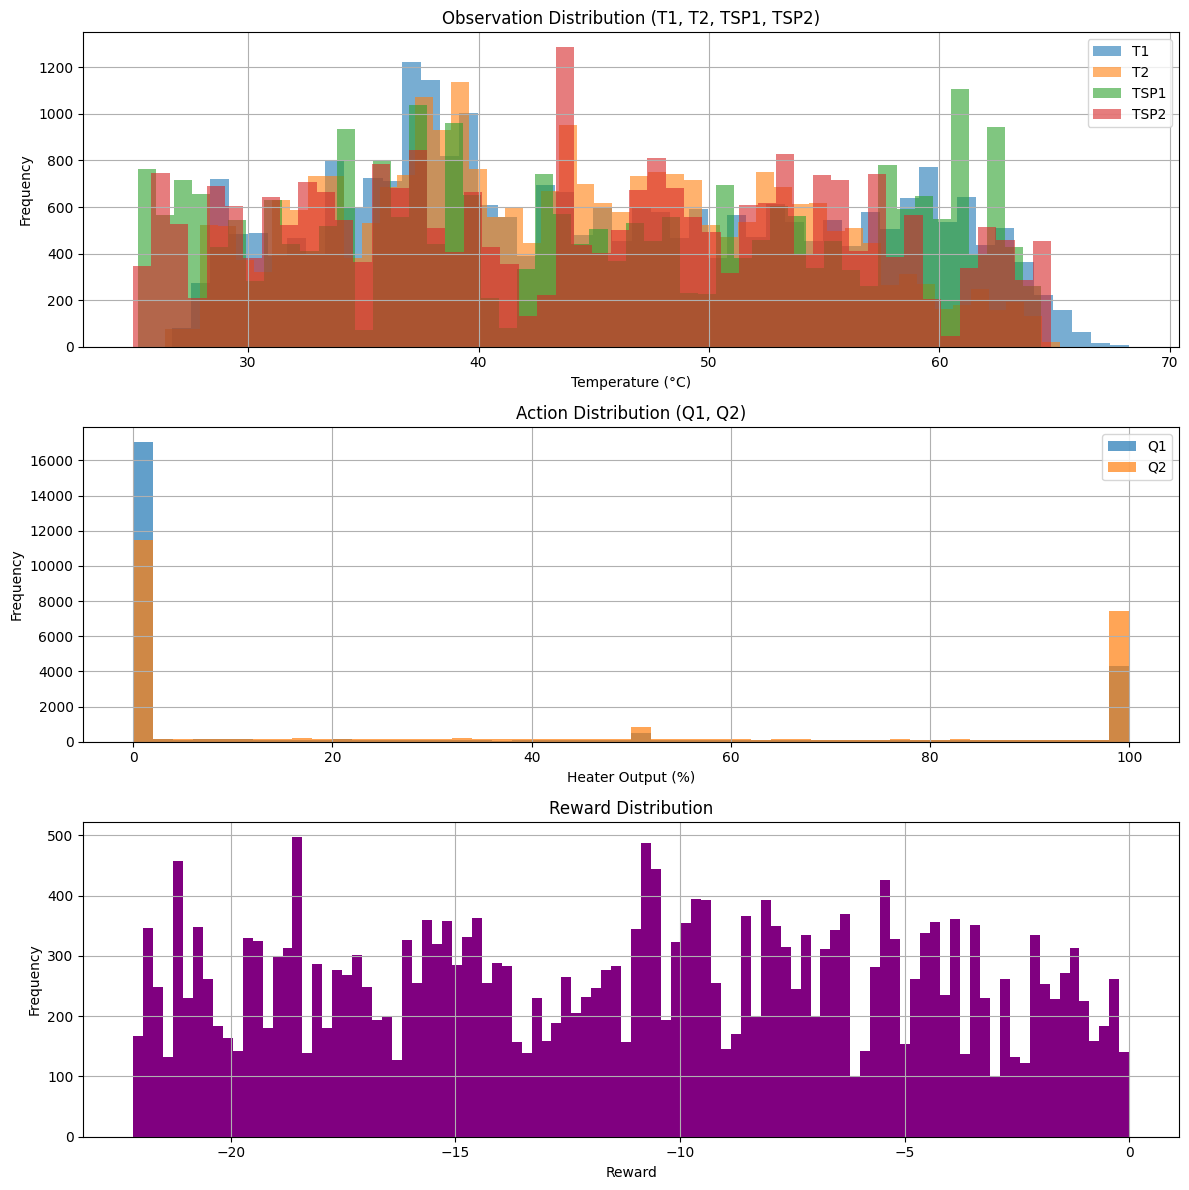

In [32]:
# Re-import after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Reload dataset
data = np.load("C:\\Users\\Developer\\TCLab\\Data\\MPC\\mpc_newreward1.npz")
# C:\\Users\\Developer\\TCLab\\Data\\mpc_dataset.npz
# Extract components
observations = data["observations"]
actions = data["actions"]
rewards = data["rewards"]

# Plot settings
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# 1. Observations (T1, T2, TSP1, TSP2)
axs[0].hist(observations[:, 0], bins=50, alpha=0.6, label="T1")
axs[0].hist(observations[:, 1], bins=50, alpha=0.6, label="T2")
axs[0].hist(observations[:, 2], bins=50, alpha=0.6, label="TSP1")
axs[0].hist(observations[:, 3], bins=50, alpha=0.6, label="TSP2")
axs[0].set_title("Observation Distribution (T1, T2, TSP1, TSP2)")
axs[0].set_xlabel("Temperature (°C)")
axs[0].set_ylabel("Frequency")
axs[0].legend()
axs[0].grid(True)

# 2. Actions (Q1, Q2)
axs[1].hist(actions[:, 0], bins=50, alpha=0.7, label="Q1")
axs[1].hist(actions[:, 1], bins=50, alpha=0.7, label="Q2")
axs[1].set_title("Action Distribution (Q1, Q2)")
axs[1].set_xlabel("Heater Output (%)")
axs[1].set_ylabel("Frequency")
axs[1].legend()
axs[1].grid(True)

# 3. Reward distribution
axs[2].hist(rewards, bins=100, color='purple')
axs[2].set_title("Reward Distribution")
axs[2].set_xlabel("Reward")
axs[2].set_ylabel("Frequency")
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Re-import after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# Reload dataset
data = np.load("C:\\Users\\Developer\\TCLab\\Data\\MPC\\mpc_newreward1.npz")
# C:\\Users\\Developer\\TCLab\\Data\\mpc_dataset.npz
# Extract components
observations = data["observations"]
actions = data["actions"]
rewards = data["rewards"]

# Plot settings
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# 1. Observations (T1, T2, TSP1, TSP2)
axs[0].hist(observations[:, 0], bins=50, alpha=0.6, label="T1")
axs[0].hist(observations[:, 1], bins=50, alpha=0.6, label="T2")
axs[0].hist(observations[:, 2], bins=50, alpha=0.6, label="TSP1")
axs[0].hist(observations[:, 3], bins=50, alpha=0.6, label="TSP2")
axs[0].set_title("Observation Distribution (T1, T2, TSP1, TSP2)")
axs[0].set_xlabel("Temperature (°C)")
axs[0].set_ylabel("Frequency")
axs[0].legend()
axs[0].grid(True)

# 2. Actions (Q1, Q2)
axs[1].hist(actions[:, 0], bins=50, alpha=0.7, label="Q1")
axs[1].hist(actions[:, 1], bins=50, alpha=0.7, label="Q2")
axs[1].set_title("Action Distribution (Q1, Q2)")
axs[1].set_xlabel("Heater Output (%)")
axs[1].set_ylabel("Frequency")
axs[1].legend()
axs[1].grid(True)

# 3. Reward distribution
axs[2].hist(rewards, bins=100, color='purple')
axs[2].set_title("Reward Distribution")
axs[2].set_xlabel("Reward")
axs[2].set_ylabel("Frequency")
axs[2].grid(True)

plt.tight_layout()
plt.show()
